In [1]:
#import libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from wordcloud import WordCloud

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
#Preprocessing
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [3]:
#defining the function to preprocess the data
def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [4]:
#reading the data
df1=pd.read_csv("Happy or Sad/EY_happy.csv")
df1=df1["Text"].to_frame()


In [5]:
#defining major function
def findtag(tweet):
    words=tweet.split()
    mention=[]
    for i in words:
        if i.startswith("@"):
            mention.append(i)
    return mention
def findmaxmention(tweet):
    a=tweet[0]
    b=tweet[1]
    if maxword in a.split():
        for j in b:
            if j not in max_mention.keys():
                 max_mention[j]=1
            else:
                max_mention[j]=max_mention[j]+1
    return tweet[0]
        

In [6]:
df1["mention"]=df1["Text"].apply(findtag)
clean_tweet_texts = []
for i in range(len(df1)):
    clean_tweet_texts.append(tweet_cleaner_updated(df1["Text"][i]))
df1["cleanText"]=clean_tweet_texts
df1.head()

,Text,mention,cleanText
0,Wishing our EY family and friends a restful an...,[@EYnews],wishing our ey family and friends restful and ...
1,"""Now, retailers need to look beyond festive de...",[@EY_UKI],now retailers need to look beyond festive deal...
2,It's time for a #DJRSpotlight! Dapo Ogunfeitim...,[@EY_US],it time for djrspotlight dapo ogunfeitimi is m...
3,"Join today's #webcast, replay for an EMEIA aud...",[@EYnewsWork],join today webcast replay for an emeia audienc...
4,"This year, I am grateful for the warm welcome ...",[@EY_US],this year am grateful for the warm welcome ve ...


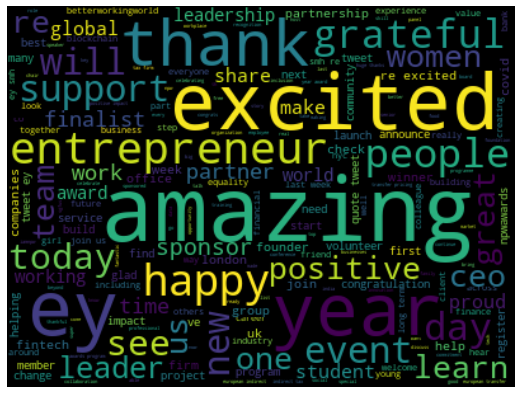

In [7]:
#Print wordCloud
all_words1 = ' '.join([text for text in df1['cleanText']])
wordcloud = WordCloud(width=400, height=300, random_state=21, max_font_size=70).generate(all_words1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("Happycloud.png")
plt.show()

In [8]:
max_mention=dict()
maxword="amazing"

In [9]:
temp=df1[["cleanText","mention"]].apply(findmaxmention,axis=1)
maxTaggedPage = max(max_mention, key=max_mention.get) 
print("The maximum tagged EY page for word "+maxword+" is :"+maxTaggedPage) 

The maximum tagged EY page for word amazing is :@EYnews


# For negative Comments

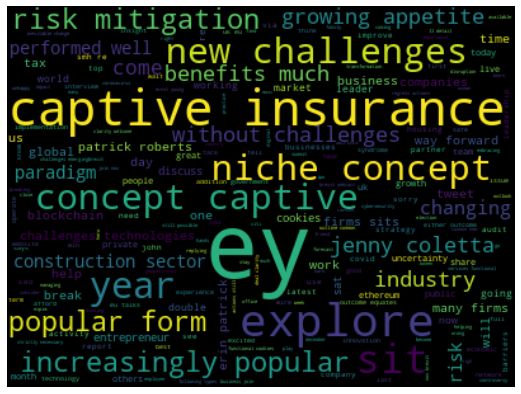

In [10]:
df1=pd.read_csv("Happy or Sad/EY_sad.csv")
df1=df1["Text"].to_frame()
df1["mention"]=df1["Text"].apply(findtag)
clean_tweet_texts = []
for i in range(len(df1)):
    clean_tweet_texts.append(tweet_cleaner_updated(df1["Text"][i]))
df1["cleanText"]=clean_tweet_texts
df1.head()
#Print wordCloud
all_words1 = ' '.join([text for text in df1['cleanText']])
wordcloud = WordCloud(width=400, height=300, random_state=21, max_font_size=70).generate(all_words1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("Sadcloud.png")
plt.show()

# For time series Analysis

In [11]:
happy=pd.read_csv("Happy or Sad/EY_happy.csv")
sad=pd.read_csv("Happy or Sad/EY_sad.csv")


In [12]:
def getdate(time):
    return time.split("T")[0]

In [13]:
def getmonth(dat):
    return str(dat[1])+"-"+str(dat[0])

In [14]:
happy["Date"]=happy["Time"].apply(getdate)
happy["Date"]=happy["Date"].astype('datetime64[ns]')
happy['year'] = pd.DatetimeIndex(happy['Date']).year
happy['month'] = pd.DatetimeIndex(happy['Date']).month
happy_Final=happy.groupby(["year","month"]).count()["Text"].to_frame()
a=happy_Final.index
happy_Final["month"]=a
happy_Final["Period"]=happy_Final["month"].apply(getmonth)

In [15]:
sad["Date"]=sad["Time"].apply(getdate)
sad["Date"]=sad["Date"].astype('datetime64[ns]')
sad['year'] = pd.DatetimeIndex(sad['Date']).year
sad['month'] = pd.DatetimeIndex(sad['Date']).month
sad_Final=sad.groupby(["year","month"]).count()["Text"].to_frame()
a=sad_Final.index
sad_Final["month"]=a
sad_Final["Period"]=sad_Final["month"].apply(getmonth)
sad_Final.head()

Text      month  Period
year month                         
2019 1        10  (2019, 1)  1-2019
     3         5  (2019, 3)  3-2019
     4         5  (2019, 4)  4-2019
     6         5  (2019, 6)  6-2019
     8         3  (2019, 8)  8-2019

In [16]:
plot_table=happy_Final[["Period","Text"]]


In [17]:
plot_table["Text2"]=0

In [18]:
for i in plot_table["Period"]:
    if i in sad_Final["Period"]:
        plot_table[plot_table["Period"]==i]["Text2"]=sad_Final[i]["text"]

In [19]:
#this part is yet to be automated
text=[5,0,5,0,3,2,3,7,5,3,3,19,23,2,0,5,0,5,5,5]
plot_table["text2"]=text

In [20]:
plot_table.rename(columns={"Text": "Happy_Count", "text2": "Sad_Count"},inplace=True)


In [21]:
plot_table

Period  Happy_Count  Text2  Sad_Count
year month                                        
2019 4       4-2019           15      0          5
     5       5-2019           25      0          0
     6       6-2019           30      0          5
     7       7-2019           15      0          0
     8       8-2019           10      0          3
     9       9-2019           25      0          2
     10     10-2019           30      0          3
     11     11-2019           20      0          7
     12     12-2019           10      0          5
2020 1       1-2020           16      0          3
     2       2-2020           24      0          3
     3       3-2020           15      0         19
     4       4-2020           10      0         23
     5       5-2020           10      0          2
     6       6-2020           10      0          0
     7       7-2020           10      0          5
     8       8-2020           15      0          0
     9       9-2020           15      0          5
     10     10-2020           15      0          5
     11     11-2020           15      0          5

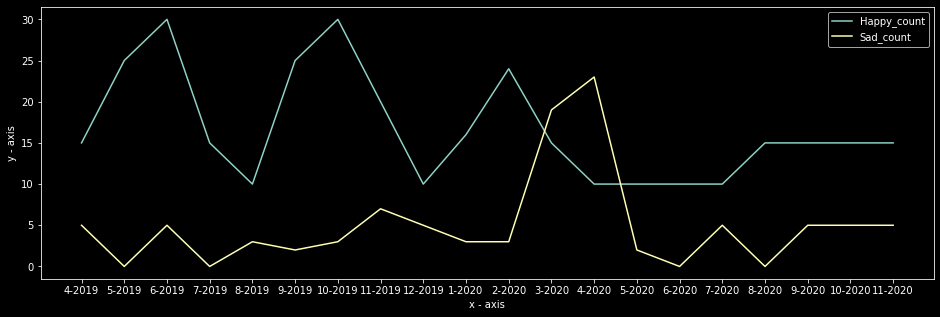

In [22]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = [16,5]
# line 1 points
x1 = plot_table["Period"]
y1 = plot_table["Happy_Count"]
# plotting the line 1 points 
plt.plot(x1, y1, label = "Happy_count")
# line 2 points
x2 = plot_table["Period"]
y2 = plot_table["Sad_Count"]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Sad_count")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
#plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.savefig("trendabovehappysad.png")
plt.show()